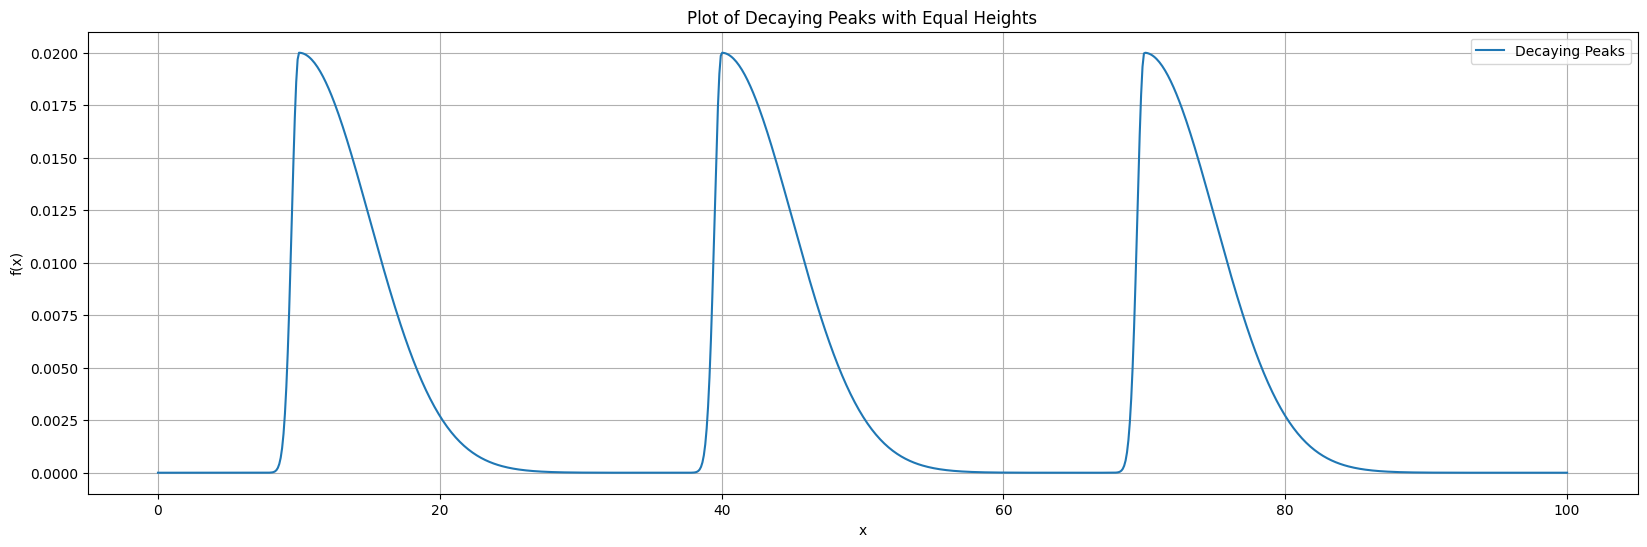

In [2]:
import torch
from loss.Treatment import Treatment
import matplotlib.pyplot as plt

treatment = Treatment(absorptionRate=2.0, decayRate=0.02, dose=0.02, firstDoseTime=10.0, dosesNum=3, timeBetweenDoses=30.0)

t = torch.linspace(0, 100, 1000)
f = treatment(0, 0, t)

plt.figure(figsize=(20, 6))
plt.plot(t, f, label='Decaying Peaks')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of Decaying Peaks with Equal Heights')
plt.legend()
plt.grid(True)
plt.show()

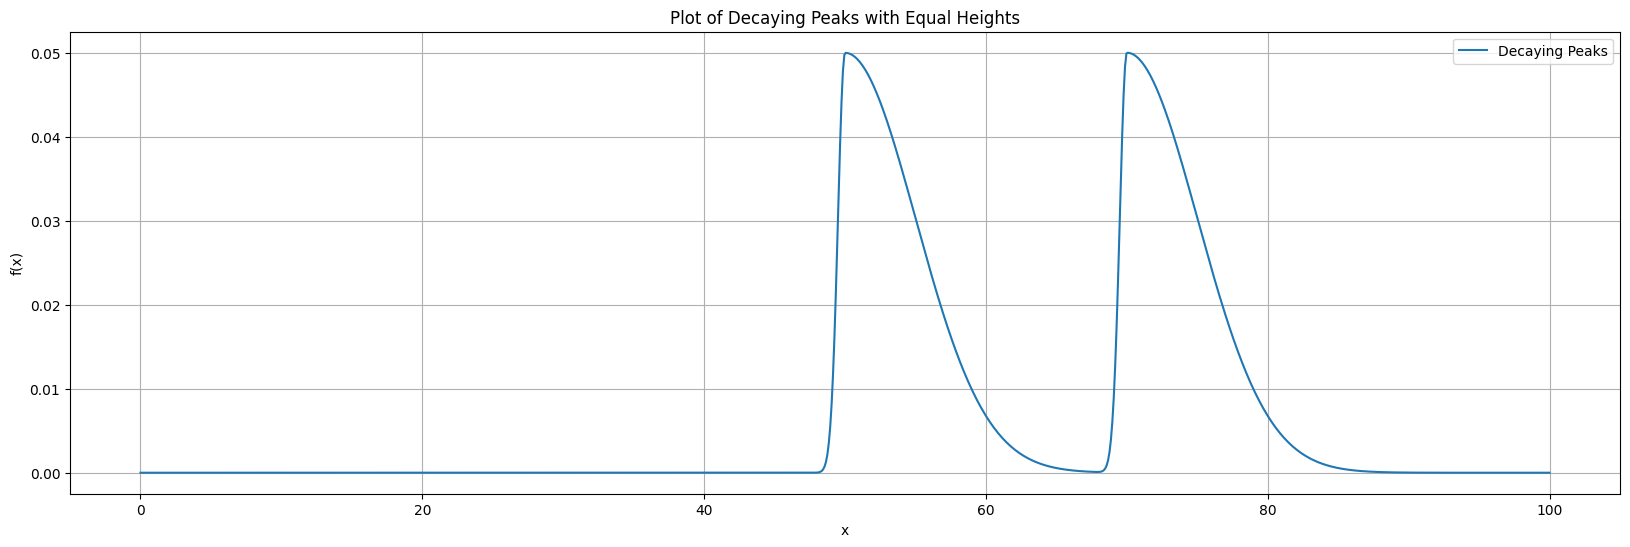

In [3]:
import torch
from loss.Treatment import Treatment
import matplotlib.pyplot as plt

treatment = Treatment(absorptionRate=2.0, decayRate=0.02, dose=0.05, firstDoseTime=50.0, dosesNum=2, timeBetweenDoses=20.0)

t = torch.linspace(0, 100, 1000)
f = treatment(0, 0, t)

plt.figure(figsize=(20, 6))
plt.plot(t, f, label='Decaying Peaks')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of Decaying Peaks with Equal Heights')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import glob

flair_path = glob.glob('/top/data/flair/*')
seg_path   = glob.glob('/top/data/seg/*')
t1_path    = glob.glob('/top/data/t1/*')
t1ce_path  = glob.glob('/top/data/t1ce/*')
t2_path    = glob.glob('/top/data/t2/*')

In [2]:
print(len(flair_path))

369


In [4]:
pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 52.6 MB 354 kB/s eta 0:00:01     |█████████████████████████       | 41.0 MB 324 kB/s eta 0:00:36
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import SimpleITK as sitk
import numpy as np
import pickle

In [5]:
X_flair=[]
a = sitk.ReadImage(flair_path[1])
a = sitk.GetArrayFromImage(a)
print(np.shape(a))
for j in range(25):
    X_flair.append((a[50+2*j,:,:]))
print(np.shape(X_flair))

(155, 240, 240)
(25, 240, 240)


In [ ]:
X_flair = np.asarray(X_flair).astype(np.float32)

In [ ]:
mean = X_flair.mean()
std = X_flair.std()
X_flair = (X_flair - mean)/(std + 1e-8)
np.min(X_flair), np.max(X_flair)

In [ ]:
pickle_out = open('/top/data/flair_25.pickle', 'wb')
pickle.dump(X_flair, pickle_out)
pickle_out.close()
del X_flair

In [ ]:
pickle_in = open('/content/drive/My Drive/Colab Notebooks/flair_25.pickle', 'rb')
X_flair = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
print(X_flair.shape[0])